# Importing Necessary Libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn numpy pandas matplotlib seaborn
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, tree, ensemble, svm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Importing the Dataset

In [3]:
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\TrafficTelligence - Advanced Traffic Volume Estimation with Machine Learning\traffic volume.csv")
data

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,NaN,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,NaN,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,NaN,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [5]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


## Handling null values

In [6]:
data.isnull().any()

holiday            True
temp               True
rain               True
snow               True
weather            True
date              False
Time              False
traffic_volume    False
dtype: bool

In [7]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

There are null values in the columns _temp, rain, snow_ and _weather_. _Temp, rain_ and _snow_ are float values. Hence we can replace them with mean values.

In [8]:
data["temp"].fillna(data["temp"].mean(), inplace = True)
data["rain"].fillna(data["rain"].mean(), inplace = True)
data["snow"].fillna(data["snow"].mean(), inplace = True)

data["weather"].fillna(data["weather"].mode()[0], inplace = True)

data.isnull().sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10768\4255905132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["temp"].fillna(data["temp"].mean(), inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10768\4255905132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

Now, there are no null values.

## Splitting Date and Time column

In [9]:
data[["Day", "Month", "Year"]] = data["date"].str.split("-", expand = True)
data[["Hours", "Minutes", "Seconds"]] = data["Time"].str.split(":", expand = True)
data.drop(columns = ["date", "Time"], axis = 1, inplace = True)

data

,holiday,temp,rain,snow,weather,traffic_volume,Day,Month,Year,Hours,Minutes,Seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,Clouds,3543,30,09,2018,19,00,00
48200,NaN,282.76,0.0,0.0,Clouds,2781,30,09,2018,20,00,00
48201,NaN,282.73,0.0,0.0,Thunderstorm,2159,30,09,2018,21,00,00
48202,NaN,282.09,0.0,0.0,Clouds,1450,30,09,2018,22,00,00


## Checking Descriptive Statistics

In [10]:
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


## Checking Correlation

Non-numeric columns: Index(['holiday', 'weather', 'Day', 'Month', 'Year', 'Hours', 'Minutes',
       'Seconds'],
      dtype='object')
                    temp      rain      snow  traffic_volume
temp            1.000000  0.009070 -0.019758        0.130034
rain            0.009070  1.000000 -0.000090        0.004714
snow           -0.019758 -0.000090  1.000000        0.000735
traffic_volume  0.130034  0.004714  0.000735        1.000000


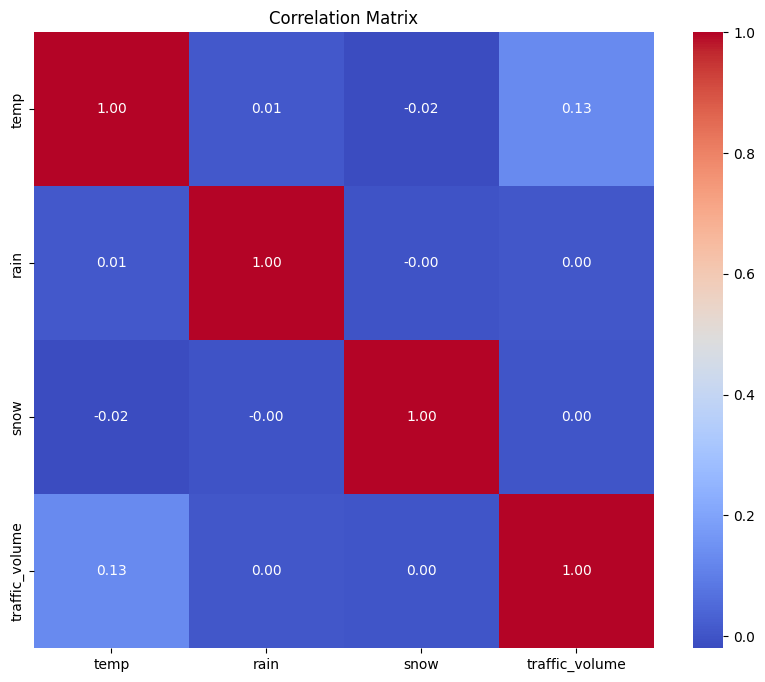

In [11]:
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

data_numeric = data.drop(columns=non_numeric_columns)

# Alternatively, use one-hot encoding for categorical variables
# data_numeric = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix
corr = data_numeric.corr()

# Display the correlation matrix
print(corr)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

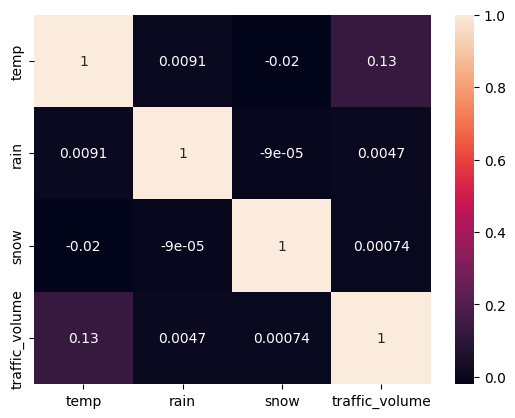

In [12]:
sns.heatmap(corr, annot = True)

# Exploratory Data Analysis

## Univariate Analysis

<Axes: xlabel='weather', ylabel='Count'>

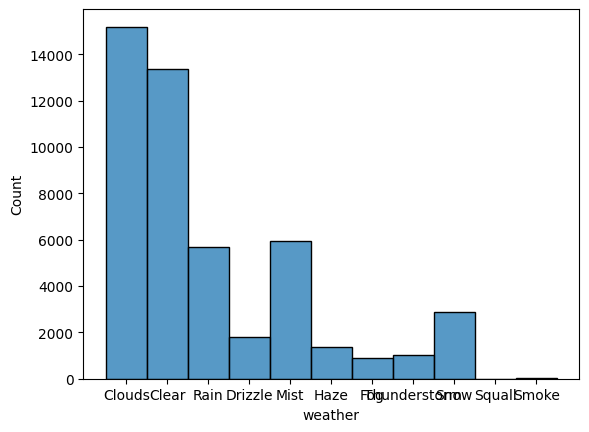

In [13]:
sns.histplot(data["weather"])

## Bivariate Analysis

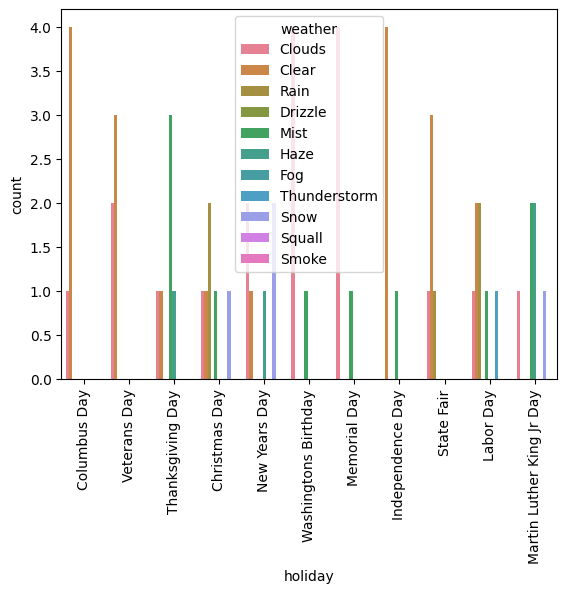

In [14]:
sns.countplot(x = "holiday", data = data, hue = data["weather"], orient = 'h')

plt.xticks(rotation=90)
plt.show()

In [15]:
data.holiday.value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [16]:
data.temp.max()

310.07

In [17]:
data.rain.max()

9831.3

## Multivariate Analysis

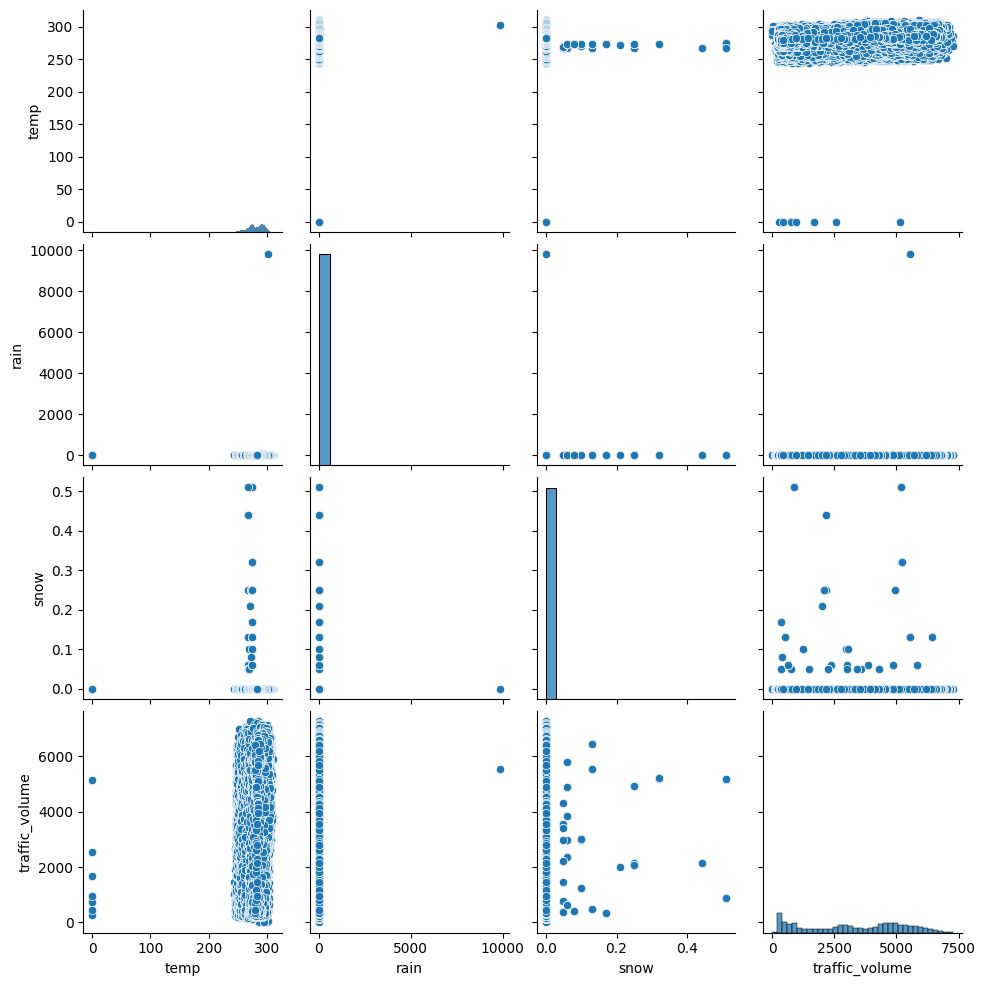

In [18]:
sns.pairplot(data)

<Axes: >

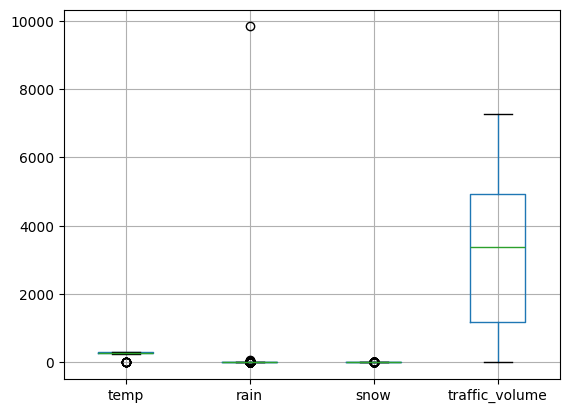

In [19]:
data.boxplot()

There are no outliers in the given dataset.

# Splitting the data into X and Y

In [20]:
y = data["traffic_volume"]
x = data.drop(columns = ["traffic_volume"], axis = 1)

names = x.columns

In [21]:
y.shape

(48204,)

## Feature Scaling

In [22]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

x["weather"] = LE.fit_transform(x["weather"])
x["holiday"] = LE.fit_transform(x["holiday"])

from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

x_Scaled = pd.DataFrame(MS.fit_transform(x), columns = x.columns)
x_Scaled.head()

,holiday,temp,rain,snow,weather,Day,Month,Year,Hours,Minutes,Seconds
0,1.0,0.929726,0.0,0.0,0.1,0.033333,0.818182,0.0,0.391304,0.0,0.0
1,1.0,0.933209,0.0,0.0,0.1,0.033333,0.818182,0.0,0.434783,0.0,0.0
2,1.0,0.933918,0.0,0.0,0.1,0.033333,0.818182,0.0,0.478261,0.0,0.0
3,1.0,0.935692,0.0,0.0,0.1,0.033333,0.818182,0.0,0.521739,0.0,0.0
4,1.0,0.938949,0.0,0.0,0.1,0.033333,0.818182,0.0,0.565217,0.0,0.0


# Splitting the data into Train and Test set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_Scaled, y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (38563, 11)
Shape of x_test: (9641, 11)
Shape of y_train: (38563,)
Shape of y_test: (9641,)


# Model Building

## Training the Model

In [24]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

NameError: name 'linear_model' is not defined

# Performance Testing and Hyperparameter Tuning

## Testing model with multiple evaluation metrics

In [ ]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [ ]:
p6 = lin_reg.predict(x_test)
p7 = Dtree.predict(x_test)
p8 = Rand.predict(x_test)
p9 = svr.predict(x_test)
p10 = XGB.predict(x_test)

## Evaluating All models

### R - squared score

In [ ]:
from sklearn import metrics
print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))

-5.501515909731952
1.0
0.9747895518275993
-24.650355727236885
0.8463600277900696


In [ ]:
print(metrics.r2_score(p6, y_test))
print(metrics.r2_score(p7, y_test))
print(metrics.r2_score(p8, y_test))
print(metrics.r2_score(p9, y_test))
print(metrics.r2_score(p10, y_test))

-5.365817964773356
0.6932709688054967
0.8036398174384651
-24.36346938774117
0.8047676682472229


### Evaluating Metrics for Random Forest Regressor

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('R square score on train set and test set are :', Rand.score(x_train, y_train), Rand.score(x_test, y_test))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test, Rand.predict(x_test))))
print('Mean absolute error :', mean_absolute_error(y_test, Rand.predict(x_test)))

R square score on train set and test set are : 0.9773739530759348 0.8375818058128627
Root mean squared error : 796.9812424765562
Mean absolute error : 506.50038792656363


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid ={'max_depth':np.arange(1,25),'n_estimators':np.arange(1,25)}
grid_search = GridSearchCV(Rand, parameter_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 22, 'n_estimators': 22}

In [ ]:
HRF = RandomForestRegressor(max_depth= 23, n_estimators= 24, random_state= 1231)
HRF.fit(x_train, y_train)

RandomForestRegressor(max_depth=23, n_estimators=24, random_state=1231)

In [ ]:
print('R square score on train set and test set are :',HRF.score(x_train, y_train),HRF.score(x_test, y_test))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,HRF.predict(x_test))))
print('Mean absolute error :',mean_absolute_error(y_test, HRF.predict(x_test)))

R square score on train set and test set are : 0.9642571063781897 0.8284810424657213
Root mean squared error : 819.0055137022869
Mean absolute error : 516.6137319871473


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(x_train)

PCA(n_components=0.9)

In [ ]:
x_train.shape

(38563, 11)

In [ ]:
pca.n_components_

5

In [ ]:
PCA_X_train = pca.transform(x_train)
PCA_X_test = pca.transform(x_test)

In [ ]:
RF_PCA = RandomForestRegressor()
RF_PCA.fit(PCA_X_train,y_train)

RandomForestRegressor()

In [ ]:
print('R square score on train set and test set are :', RF_PCA.score(PCA_X_train, y_train),RF_PCA.score(PCA_X_test, y_test))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,RF_PCA.predict(PCA_X_test))))
print('Mean absolute error :', mean_absolute_error(y_test, RF_PCA.predict(PCA_X_test)))

R square score on train set and test set are : 0.9721414391913442 0.8026788704485673
Root mean squared error : 878.4510327379905
Mean absolute error : 590.0326325070014


# Model Deployment

## Saving the model

In [ ]:
import pickle
#pickle.dump(Rand, open("model.pkl", 'wb'))
#pickle.dump(LE, open("encoder.pkl", 'wb'))
#pickle.dump(MS, open("scaler.pkl", 'wb'))
pickle.dump(HRF, open("HRF_Model.pkl", 'wb'))
pickle.dump(RF_PCA, open("RF_PCA_Model.pkl", 'wb'))
pickle.dump(pca, open("PCA.pkl", 'wb'))